<a href="https://colab.research.google.com/github/alexandertaoadams/AlexanderAdamsMastersThesis/blob/main/Timing_Test_For_Compiling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install gpjax

In [5]:
import jax
import gpjax
import jax.numpy as jnp
import numpy as np
import time
import matplotlib.pyplot as plt

In [3]:
!git clone https://github.com/alexandertaoadams/AlexanderAdamsMastersThesis.git

import sys
sys.path.insert(0, '/content/AlexanderAdamsMastersThesis')
import AlexanderAdamsMastersThesis.src as src

from src.algorithms import Gram_XX, Gram_XX_jit

fatal: destination path 'AlexanderAdamsMastersThesis' already exists and is not an empty directory.


## **Timing Test**

In [17]:
# Approximation of 1 second long Brownian Motion
def brownian_motion(number, dimensions, length):
    shape = (number, dimensions, length)
    key = jax.random.PRNGKey(0)
    gaussian_matrix = jax.random.normal(key, shape) / jnp.sqrt(length)
    brownian_matrix = jnp.cumsum(gaussian_matrix, axis=2)
    return jnp.array(brownian_matrix)

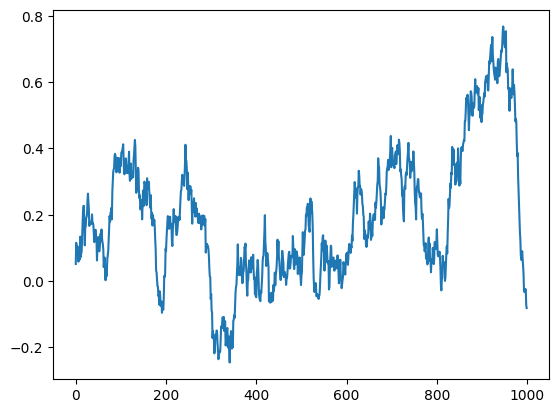

In [18]:
bm = brownian_motion(1, 1, 1000)
plt.plot(bm[0,0,:])

In [5]:
n_levels = 4
n_X = 100
n_dimensions=32
n_timesteps=100

bm = brownian_motion(n_X, n_dimensions, n_timesteps)

In [6]:
# Eager
t0 = time.perf_counter()
_ = Gram_XX(bm, n_X, n_timesteps, n_levels-1, np.ones(n_dimensions), 1.0, np.ones(n_levels))
t1 = time.perf_counter()

In [7]:
# Compile
_ = Gram_XX_jit(bm, n_X, n_timesteps, n_levels-1, np.ones(n_dimensions), 1.0, np.ones(n_levels))

# Run
s0 = time.perf_counter()
_ = Gram_XX_jit(bm, n_X, n_timesteps, n_levels-1, np.ones(n_dimensions), 1.0, np.ones(n_levels))
s1 = time.perf_counter()

In [8]:
print("Eagerly executed:", t1-t0)
print("Compiled:", s1-s0)
print("Speedup:", (t1-t0)/(s1-s0))

Eagerly executed: 5.3531058459999485
Compiled: 0.0005428690000144343
Speedup: 9860.76907293954
